In [1]:
import functools
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate, interpolate

In [2]:
k0 = [1, 1, 1, 1]
def model(t, x):
    return np.array(
        [
            0.0,  # A
            0.0,  # B
            +k0[2] * x[1] * x[4],  # D
            +k0[3] * x[4],  # E
            +k0[0] * x[0]
            +k0[1] * x[4] ** 2 * x[5]
            -k0[2] * x[1] * x[4]
            -k0[3] * x[4],  # X
            -k0[1] * x[4] ** 2 * x[5] + k0[2] * x[1] * x[4],  # Y
        ]
    )

In [3]:
tmin = 0
tmax = 20.
n = 501
t = np.linspace(tmin, tmax, n)

In [4]:
sol = integrate.solve_ivp(model, [tmin, tmax], y0=[1, 3, 0, 0, 1, 1], method="LSODA", dense_output=True)

In [5]:
sol

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.054e-05 ...  1.987e+01  2.000e+01]
        y: [[ 1.000e+00  1.000e+00 ...  1.000e+00  1.000e+00]
            [ 3.000e+00  3.000e+00 ...  3.000e+00  3.000e+00]
            ...
            [ 1.000e+00  1.000e+00 ...  5.859e-01  6.272e-01]
            [ 1.000e+00  1.000e+00 ...  4.707e+00  4.719e+00]]
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x0000024776F9DD90>
 t_events: None
 y_events: None
     nfev: 335
     njev: 0
      nlu: 0

In [6]:
dir(sol.sol)

['__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_call_single',
 'ascending',
 'interpolants',
 'n_segments',
 't_max',
 't_min',
 'ts',
 'ts_sorted']

In [7]:
sol.t.shape

(145,)

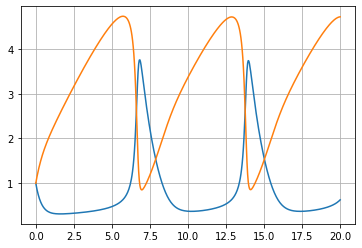

In [8]:
fig, axe = plt.subplots()
axe.plot(t, sol.sol(t).T[:, [4,5]])
#axe.plot(sol.t, sol.y.T[:, [4,5]], linestyle="none", marker=".")
axe.grid()

In [9]:
x = sol.sol(t).T

In [10]:
def factory(t, n=1):
    def wrapped(x):
        return interpolate.UnivariateSpline(t, x, k=5, s=6).derivative(n=n)(t)
    return wrapped

In [11]:
dxdt = np.apply_along_axis(factory(t), 0, x)

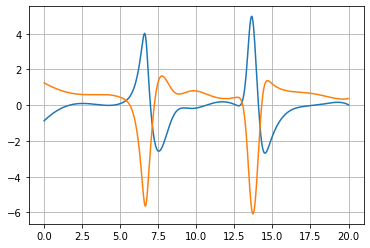

In [12]:
fig, axe = plt.subplots()
axe.plot(t, dxdt[:,[4,5]])
axe.grid()

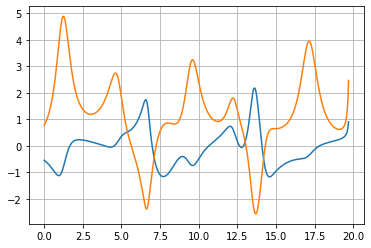

In [13]:
fig, axe = plt.subplots()
axe.plot(t[:-8], (dxdt[:,[4,5]].T / dxdt[:,3]).T[:-8])
axe.grid()

In [17]:
t.max() + t[1:11]

array([20.04, 20.08, 20.12, 20.16, 20.2 , 20.24, 20.28, 20.32, 20.36,
       20.4 ])